# ***MNIST Example***

In [1]:
# please make sure that you have the following libraries, otherwise you shall install them.
# just uncomment the pip command down below and run this cell
# %pip install numpy matplotlib idx2numpy

In [2]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
import numpy.linalg as inv

In [3]:
X_train = idx2numpy.convert_from_file('./dataset/train-images-idx3-ubyte').reshape(60000, 784)
X_test = idx2numpy.convert_from_file('./dataset/t10k-images-idx3-ubyte').reshape(10000, 784)
y_train = idx2numpy.convert_from_file('./dataset/train-labels-idx1-ubyte')
y_test = idx2numpy.convert_from_file('./dataset/t10k-labels-idx1-ubyte')

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


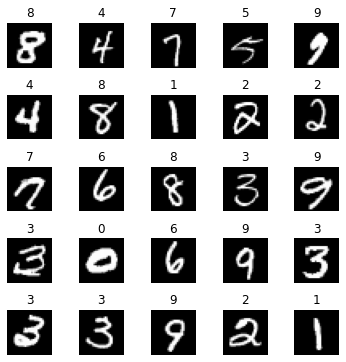

In [5]:
m, n = X_train.shape

fig, axes = plt.subplots(5,5, figsize=(5,5))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()

In [6]:
class NeuralNetwork:
    def __init__(self, X_train, X_test, y_train, y_test, ** layers):
        self.X_train = self.data_normalize(X_train)[0]
        self.X_test = self.data_normalize(X_test)[0]
        self.y_train = y_train
        self.y_test = y_test
        self.layers = list(layers.items())
        self.Weights = []
        self.Biases = []
        for index, layer in enumerate(self.layers):
            if index == 0:
                self.Weights.append(np.random.rand(self.X_train.shape[1], layer[1].neurons))
            else:
                self.Weights.append(np.random.rand(self.layers[index - 1][1].neurons, layer[1].neurons,))
            self.Biases.append(np.random.rand(1, layer[1].neurons))

    def data_normalize(self, X):
        X_norm = [0 for i in range(X.shape[1])]
        sigma_list = []
        miu_list = []
        for index in range(X.shape[1]):
            avg = np.average(X[:, index])
            std = np.std(X[:, index])
            sigma_list.append(std)
            miu_list.append(avg)
            if std != 0:    
                X_norm[index] = (X[:, index] - avg) / std
            else:
                X_norm[index] = X[:, index]
        return np.array(X_norm).T, sigma_list, miu_list

    def parameters(self):
        n_weights = 0
        for i in range(len(self.layers)):
            n_weights += np.size(self.Weights[i]) + np.size(self.Biases[i])
        print('total parameters in your model', n_weights)

    def dense(self, A_in, W, B, activation):
        Z = np.matmul(A_in, W) + B

        if activation == 'sigmoid':
            A_out = self.sigmoid(Z)
        elif activation == 'softmax':
            A_out = self.softmax(Z)
        elif activation == 'relu':
            A_out = self.relu(Z)
        elif activation == 'linear':
            A_out = Z
        else: 
            print('sussy baka, choose the right activation you silly kid')
            print('valid activations are: relu, linear, softmax, sigmoid')
        return A_out
    
    def relu(self, Z):
        return np.maximum(0, Z)

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def softmax(self, Z):
        exponentials = np.exp(Z)
        return exponentials / (np.sum(exponentials))

    def relu_grad(self, Z):
        return Z > 0

    def sigmoid_grad(self, Z):
        sig = self.sigmoid(Z)
        return sig * (1.0 - sig)

    def softmax_grad(self, Z):
        soft = self.softmax(Z)
        return soft * (1.0 - soft)

    def cross_entropy(self, hypo):
        return -1 * np.mean(self.y_train * np.log(hypo))

    def forwardPropagation(self):
        A_in = X_train
        for index, layer in enumerate(self.layers):
            A_in = self.dense(A_in, self.Weights[index], self.Biases[index], layer[1].activation)

    def backwardPropagation(self):
        pass

    def fit(self, iterations):
        pass

    def testModel(self):
        pass

In [7]:
class Layer:
    def __init__(self, neurons, activation):
        self.neurons = neurons
        self.activation = activation

In [8]:
neural_network = NeuralNetwork(
    X_train = X_train,
    X_test = X_test,
    y_test = y_test,
    y_train = y_test,
    layer1 = Layer(25, 'relu'),
    layer2 = Layer(15, 'relu'),
    layer3 = Layer(10, 'softmax')
)

neural_network.parameters()
for i in range(len(neural_network.layers)):
    print(neural_network.Weights[i].shape)
    print(neural_network.Biases[i].shape)


total parameters in your model 20175
(784, 25)
(1, 25)
(25, 15)
(1, 15)
(15, 10)
(1, 10)
